In [1]:
# In order for Python to find the Spark, download the findspark library and start it with findspark.init() function.
import findspark
findspark.init()

In [2]:
# In order to work with RDDs, we need to create a SparkContext.
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [3]:
spark=SparkSession.builder\
    .master("local[*]")\
    .appName("WordCount")\
    .getOrCreate()

22/03/24 00:51:52 WARN Utils: Your hostname, futamatatakuminoMacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.64 instead (on interface en0)
22/03/24 00:51:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/03/24 00:51:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:
sc=spark.sparkContext

In [5]:
text = sc.textFile("/Users/futamatatakumi/Documents/Python/Research Seminar/Al Jazeera.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/Asahi.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/BBC.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/CNN.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/France24.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/GlobalTimes.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/Guardian.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/NewYorkTimes.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/Tokyo.txt," 
                   + "/Users/futamatatakumi/Documents/Python/Research Seminar/WashingtonPost.txt")

In [6]:
def lower_clean_str(x):
  punc='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-'
  lowercased_str = x.lower()
  for ch in punc:
    lowercased_str = lowercased_str.replace(ch, '')
  return lowercased_str

In [7]:
text_cleaned = text.map(lower_clean_str)

In [8]:
text_count = text_cleaned.flatMap(lambda x: x.split(' '))\
                .map(lambda x: (x, 1))\
                .reduceByKey(lambda x, y: x+y)

In [9]:
df = text_count.toDF()
df1 = df.toPandas()

/Users/futamatatakumi/opt/anaconda3/envs/Spark/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/Users/futamatatakumi/opt/anaconda3/envs/Spark/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/Users/futamatatakumi/opt/anaconda3/envs/Spark/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/Users/futamatatakumi/opt/anaconda3/envs/Spark/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling


In [10]:
df1 = df1.rename(columns={'_1':'word', '_2':'count'})
prepositions = ['the', 'and', 'a', 'an', 'of', 'to', 'in', 'that', 'have', 'at', 'it', 'as', 'for', 'was', 'is', \
                'be', 'are', 'from', 'by', 'on', 'or', '', '–', 'were', 'with', 'their', 'some', 'her', 'more', \
                'but', 'this', 'there', 'said', 'has', 'had', 'not', 'its']
df1 = df1[~df1['word'].isin(prepositions)]
df_final = df1.sort_values('count', ascending=False).head(10)
df_final

,word,count
1625,games,118
1907,tokyo,81
2457,olympic,80
1348,olympics,72
1917,athletes,56
274,pandemic,45
1099,world,31
657,chinese,30
2187,japan,30
1357,people,29


In [11]:
df1.count()

word     2704
count    2704
dtype: int64

# Word Cloud

In [12]:
import glob

read_files = glob.glob("/Users/futamatatakumi/Documents/Python/Research Seminar/*.txt")

with open("result.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

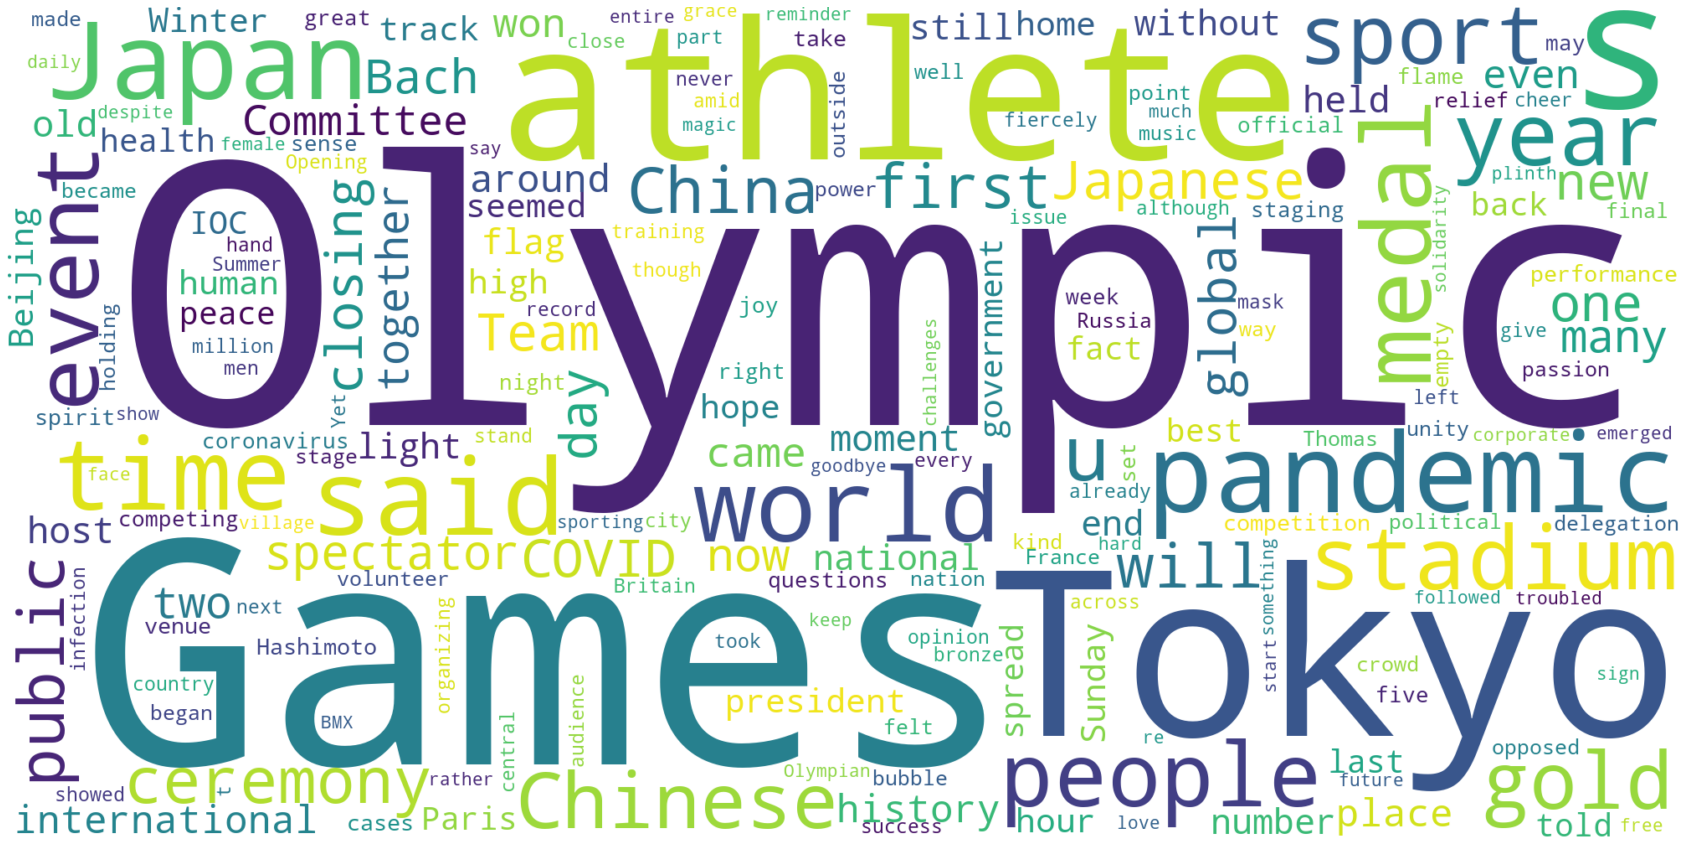

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Load text file
data = open("/Users/futamatatakumi/Documents/Python/Research Seminar/result.txt", encoding="utf8").read()

# Create image
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, collocations=False, background_color="white", stopwords = STOPWORDS).generate(data)
plt.figure(figsize=(30, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
# Save image
wordcloud.to_file("/Users/futamatatakumi/Documents/Python/Research Seminar/result.png")